In [71]:
import metrics
import tensorflow as tf
from utils import *
import scipy.signal as signal
from metrics import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load some fake data and high quality real data

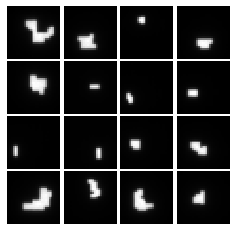

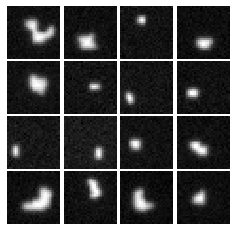

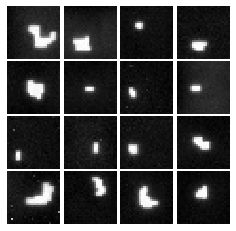

In [26]:
epid = EPID(batch_size=16, data_base_dir='../data')
show_images(epid.X[:16])

phantom_fake = PHANTOM(batch_size=16, data_base_dir = '../data', fake=True) 
show_images(phantom_fake.X[:16])

phantom_real = PHANTOM(batch_size=16, data_base_dir = '../data', fake=False)
show_images(phantom_real.X[:16])

In [27]:
# get frames
epid_frame = epid.get_tensor(0)
real_noise_frame = phantom_real.get_tensor(0)
fake_noise_frame = phantom_fake.get_tensor(0)



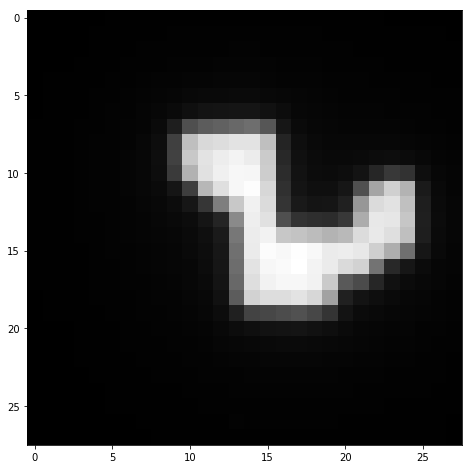

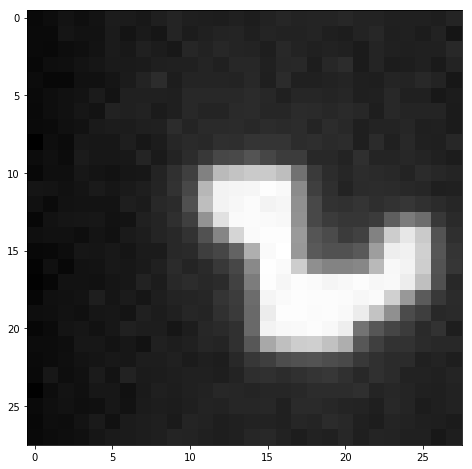

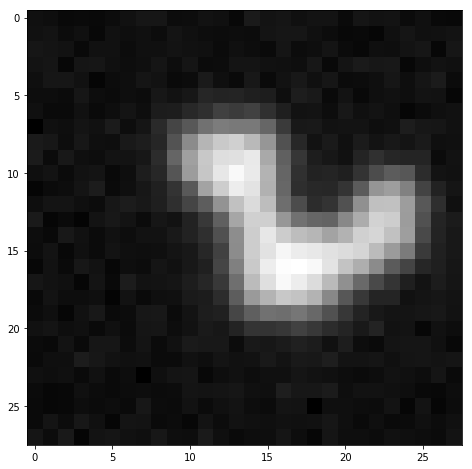

In [33]:
plot_tensor(epid_frame)
plot_tensor(real_noise_frame)
plot_tensor(fake_noise_frame)

In [38]:
real_filtered = wiener(real_noise_frame)
fake_filtered = wiener(fake_noise_frame)



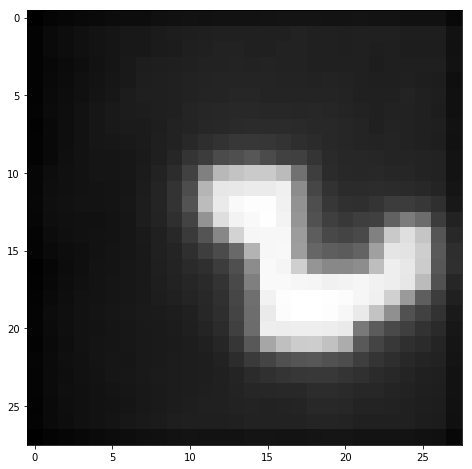

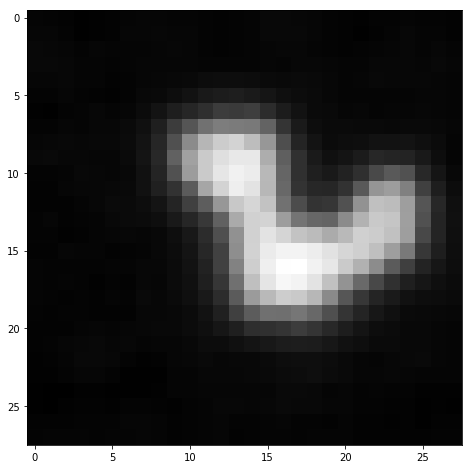

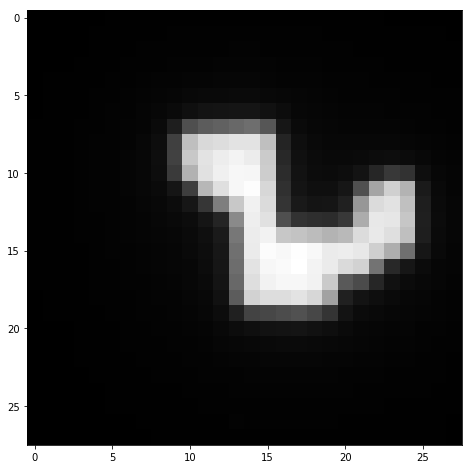

In [40]:
plot_tensor(real_filtered)
plot_tensor(fake_filtered)
plot_tensor(epid_frame)

In [78]:
print(psnr(epid_frame, real_noise_frame))
print(psnr(epid_frame, real_filtered))

print(ssim(epid_frame, fake_noise_frame))
print(ssim(epid_frame, fake_filtered))

11.951600074768066
12.227100372314453
0.8720347881317139
0.8885377645492554
